In [122]:
import tensorflow
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense,LeakyReLU
from keras.layers import Conv2D,MaxPooling2D
from keras import backend as k
from keras.preprocessing import image
import numpy as np
from tensorflow.keras.optimizers import Adam

In [123]:
img_width,img_height = 150,150

train_data_dir = '/content/drive/MyDrive/Data/skin_data/Train'
val_data_dir = '/content/drive/MyDrive/Data/skin_data/Val'

nb_train_sample = 1000
nb_val_sample = 10
epochs =20
batch_size =10

if k.image_data_format() == 'channels_first':
  input_shape = (3,img_width,img_height)
else:
  input_shape = (img_width,img_height,3)

train_datagen = ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range =0.2,
    horizontal_flip = True,
    vertical_flip = True
)
test_datagen = ImageDataGenerator(
     rescale = 1./255,
    shear_range = 0.2,
    zoom_range =0.2,
    horizontal_flip = True,
    vertical_flip = True
                  
)


In [154]:
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size = (150,150),
    batch_size = 2,
    color_mode="rgb",
    class_mode = 'binary'

)

val_generator  = test_datagen.flow_from_directory(
    val_data_dir,
    target_size = (150,150),
    batch_size = 2,
    color_mode="rgb",
    class_mode = 'binary'

)

Found 193 images belonging to 2 classes.
Found 50 images belonging to 2 classes.


In [155]:
model = Sequential()
model.add(Conv2D(32,(3,3),input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# model.add(Conv2D(32,(3,3),input_shape=input_shape))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3),input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# model.add(Conv2D(64,(3,3),input_shape=input_shape))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2,2)))



model.add(Conv2D(128,(3,3),input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))



model.add(Flatten())
model.add(Dense(32))
# model.add(Activation('relu'))
# model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

opt =Adam(lr=0.0002,beta_1=0.5)

model.summary()
model.compile(loss='binary_crossentropy',
              optimizer=opt,
              metrics =['accuracy'] )


Model: "sequential_44"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_149 (Conv2D)          (None, 148, 148, 32)      896       
_________________________________________________________________
activation_218 (Activation)  (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d_149 (MaxPoolin (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_150 (Conv2D)          (None, 72, 72, 64)        18496     
_________________________________________________________________
activation_219 (Activation)  (None, 72, 72, 64)        0         
_________________________________________________________________
max_pooling2d_150 (MaxPoolin (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_151 (Conv2D)          (None, 34, 34, 128)     

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [156]:
history = model.fit(
    train_generator,
    steps_per_epoch = 8,
    epochs = 5,
    validation_data = val_generator,
    validation_steps = nb_val_sample,
)

# history = model.fit(
#     train_generator,
#     validation_data = val_generator,
#     steps_per_epoch =10,
#     epochs = 8,
#     validation_steps= 10,
#     verbose = 2
# )


Epoch 1/5
8/8 [==============================] - 39s 295ms/step - loss: 1.0568 - accuracy: 0.4375 - val_loss: 0.7064 - val_accuracy: 0.4500
Epoch 2/5
8/8 [==============================] - 2s 271ms/step - loss: 0.7830 - accuracy: 0.3750 - val_loss: 0.6557 - val_accuracy: 0.6500
Epoch 3/5
8/8 [==============================] - 2s 238ms/step - loss: 0.5690 - accuracy: 0.8125 - val_loss: 0.7133 - val_accuracy: 0.5500
Epoch 4/5
8/8 [==============================] - 2s 228ms/step - loss: 0.6885 - accuracy: 0.5625 - val_loss: 0.6794 - val_accuracy: 0.6500
Epoch 5/5
8/8 [==============================] - 2s 257ms/step - loss: 0.6550 - accuracy: 0.7500 - val_loss: 0.7147 - val_accuracy: 0.5000


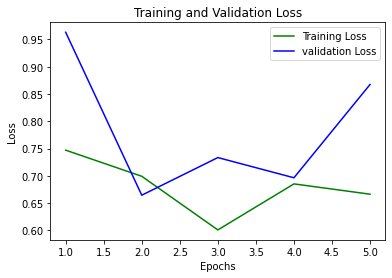

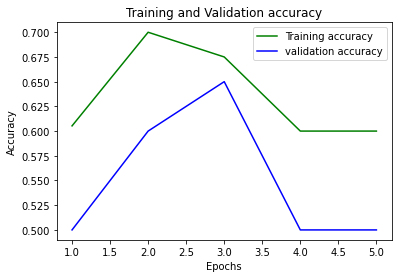

In [143]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,6)
plt.plot(epochs, loss_train, 'g', label='Training Loss')
plt.plot(epochs, loss_val, 'b', label='validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

loss_train = history.history['accuracy']
loss_val = history.history['val_accuracy']
epochs = range(1,6)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

{'melanoma': 0, 'notmelanoma': 1}

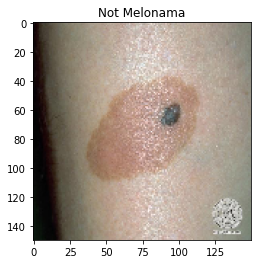

In [54]:
import matplotlib.pyplot as plt
# model.save_weights('first.h5')

img_pred = image.load_img('/content/drive/MyDrive/Data/skin_data/Val/notmelanoma/38_orig.jpg',target_size = (150,150))
plt.title('Not Melonama')
plt.imshow(img_pred)
img_pred = image.img_to_array(img_pred)
img_pred = np.expand_dims(img_pred,axis=0)
# print(img_pred)
train_generator.class_indices

In [59]:
rslt = model.predict(img_pred)
rslt = np.round(rslt)
rslt = np.array(rslt).astype(int)
if rslt[0,0] >=1:
  print('Not melonama')
else:
  print('Melonama')



print(rslt)

Not melonama
[[102]]


In [56]:
import os
y_actual = []
y_test = []
valMelnoma = '/content/drive/MyDrive/Data/skin_data/Val/melanoma'
valNot = '/content/drive/MyDrive/Data/skin_data/Val/notmelanoma'

for i in os.listdir(valMelnoma):
  rslt =[]
  img = image.load_img(valMelnoma+'/'+i,target_size=(150,150))
  img = image.img_to_array(img)
  img = np.expand_dims(img,axis=0)
  ##############
  rslt = model.predict(img)
  rslt = np.round(rslt)
  rslt = np.array(rslt).astype(int)
  y_test.append(rslt[0,0])

  y_actual.append(0)
  
  
for i in os.listdir(valNot):
  rslt =[]
  img = image.load_img(valNot+"/"+i,target_size=(150,150))
  img = image.img_to_array(img)
  img = np.expand_dims(img,axis=0)
  ##############
  rslt = model.predict(img)
  rslt = np.round(rslt)
  rslt = np.array(rslt).astype(int)
  y_test.append(rslt[0,0])
  y_actual.append(1)

In [58]:
y_actual = np.array(y_actual).astype(int)
y_test = np.array(y_test).astype(int)

y_test

array([ 65, 122,  99, 113,  64,  99,  68, 104,  88,  85, 101,  95,  85,
       114,  85, 105,  63,  82,  73, 105,  66,  96,  99, 103,  76,  71,
        78, 102,  89,  77,  95, 114,  89,  61, 101, 116,  84,  78,  76,
        27, 102,  82,  73,  78, 116, 107, 107,  78,  57,  97])

In [11]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_actual) 
cm


array([[ 1,  0],
       [26, 23]])

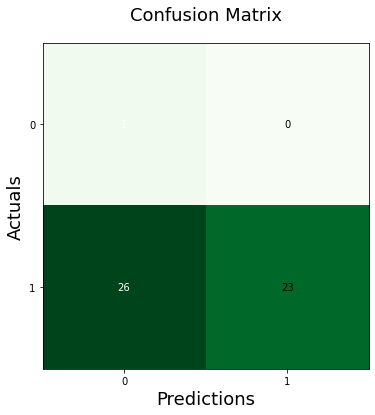

{'melanoma': 0, 'notmelanoma': 1, 'output': 2}

In [16]:
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat = cm, figsize = ( 6 , 6 ), cmap = plt.cm.Greens)
plt.xlabel( 'Predictions' , fontsize = 18 ) 
plt.ylabel( 'Actuals' , fontsize = 18 )
plt.title( 'Confusion Matrix' , fontsize = 18 ) 
plt.show()
train_generator.class_indices

In [13]:
from sklearn.metrics import  classification_report
print(classification_report(y_test,y_actual))

              precision    recall  f1-score   support

           0       0.04      1.00      0.07         1
           1       1.00      0.47      0.64        49

    accuracy                           0.48        50
   macro avg       0.52      0.73      0.36        50
weighted avg       0.98      0.48      0.63        50

